In [2]:
#importing python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('expresso_processed.csv')
data 

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64371,34995,K > 24 month,2300.0,10.0,2224.0,741.0,25.0,1441.0,3.0,NO,62,0
64372,34996,K > 24 month,10800.0,27.0,10801.0,3600.0,26.0,11460.0,25.0,NO,45,0
64373,34997,K > 24 month,4000.0,4.0,4007.0,1336.0,5.0,11873.0,3.0,NO,50,0
64374,34998,K > 24 month,13600.0,28.0,14600.0,4867.0,37.0,3676.0,291.0,NO,62,0


In [4]:
data.isnull().sum()

Unnamed: 0        0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
MRG               0
REGULARITY        0
CHURN             0
dtype: int64

In [5]:
data.columns

Index(['Unnamed: 0', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'MRG',
       'REGULARITY', 'CHURN'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      64376 non-null  int64  
 1   TENURE          64376 non-null  object 
 2   MONTANT         64376 non-null  float64
 3   FREQUENCE_RECH  64376 non-null  float64
 4   REVENUE         64376 non-null  float64
 5   ARPU_SEGMENT    64376 non-null  float64
 6   FREQUENCE       64376 non-null  float64
 7   DATA_VOLUME     64376 non-null  float64
 8   ON_NET          64376 non-null  float64
 9   MRG             64376 non-null  object 
 10  REGULARITY      64376 non-null  int64  
 11  CHURN           64376 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 5.9+ MB


In [7]:
data.shape

(64376, 12)

In [8]:
data.describe()

,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
count,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.00000,64376.000000,64376.000000
mean,16216.330620,5061.212812,10.630126,5173.670560,1724.561591,13.252718,3252.074189,218.65919,33.197496,0.456319
std,9501.522628,6777.622016,12.490926,6913.023944,2304.338459,13.988994,7841.567790,754.75000,20.432429,0.498092
min,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,8046.750000,1000.000000,2.000000,1001.000000,334.000000,3.000000,1.000000,3.00000,14.000000,0.000000
50%,16093.500000,2900.000000,6.000000,2951.000000,984.000000,8.000000,507.000000,15.00000,32.000000,0.000000
75%,24140.250000,6500.000000,14.000000,6699.000000,2233.000000,18.000000,3156.000000,97.00000,54.000000,1.000000
max,34999.000000,286500.000000,133.000000,323541.000000,107847.000000,91.000000,283493.000000,25263.00000,62.000000,1.000000


In [9]:
#seperating into Categorical and Numerical columns
cat = data.select_dtypes(exclude = 'number')
num = data.select_dtypes(include = 'number')

display(cat.head())
display(num.head())

,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO


,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


In [14]:
#Encode categorical columns
from sklearn.preprocessing import LabelEncoder, StandardScaler
new_data = data.copy()
new_data.drop(['Unnamed: 0', 'MRG'], axis = 1, inplace = True)
encoder = LabelEncoder()
scaler = StandardScaler()

for i in new_data.drop('CHURN', axis = 1):
    if i in cat.columns:
        new_data[i] = encoder.fit_transform(new_data[i])
    else:
        new_data[i] = scaler.fit_transform(new_data[[i]])

new_data.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,7,-0.304123,-0.530800,-0.314144,-0.314002,-0.375492,-0.380804,-0.288388,-0.058608,1
1,7,-0.525441,-0.610858,-0.461982,-0.461985,-0.589948,0.138867,-0.288388,-0.205435,1
2,7,0.706564,1.710845,0.645935,0.645934,1.769067,-0.070404,-0.284413,0.773409,1
3,5,-0.599214,-0.690917,-0.603890,-0.603892,-0.804404,-0.317423,-0.279113,-1.575816,1
4,7,-0.569705,-0.610858,-0.577707,-0.577854,-0.732919,-0.037885,-0.252614,-0.596972,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

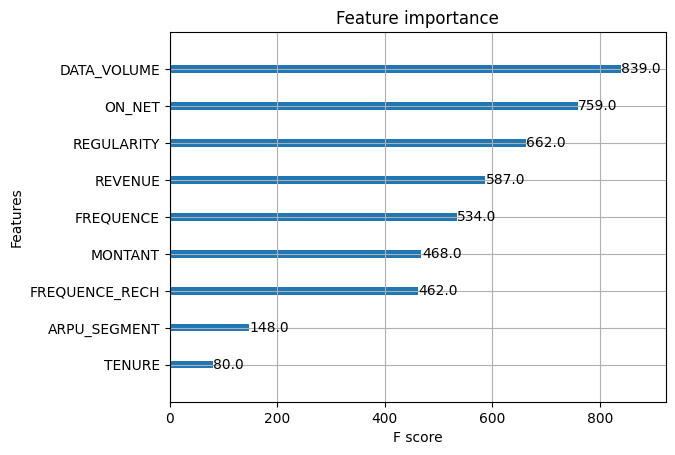

In [15]:
#Feature Selection
import xgboost as xgb
model = xgb.XGBClassifier()
x = new_data.drop('CHURN', axis = 1)
y = new_data['CHURN']
model.fit(x, y)

xgb.plot_importance(model)

In [23]:
#Data modelling
new_data

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,7,-0.304123,-0.530800,-0.314144,-0.314002,-0.375492,-0.380804,-0.288388,-0.058608,1
1,7,-0.525441,-0.610858,-0.461982,-0.461985,-0.589948,0.138867,-0.288388,-0.205435,1
2,7,0.706564,1.710845,0.645935,0.645934,1.769067,-0.070404,-0.284413,0.773409,1
3,5,-0.599214,-0.690917,-0.603890,-0.603892,-0.804404,-0.317423,-0.279113,-1.575816,1
4,7,-0.569705,-0.610858,-0.577707,-0.577854,-0.732919,-0.037885,-0.252614,-0.596972,1
...,...,...,...,...,...,...,...,...,...,...
64371,7,-0.407405,-0.050447,-0.426686,-0.426834,0.839758,-0.230960,-0.285738,1.409658,0
64372,7,0.846732,1.310551,0.814025,0.813879,0.911244,1.046728,-0.256589,0.577640,0
64373,7,-0.156577,-0.530800,-0.168765,-0.168623,-0.589948,1.099397,-0.285738,0.822351,0
64374,7,1.259860,1.390610,1.363572,1.363716,1.697582,0.054062,0.095848,1.409658,0


AttributeError: module 'numpy' has no attribute 'matrix'

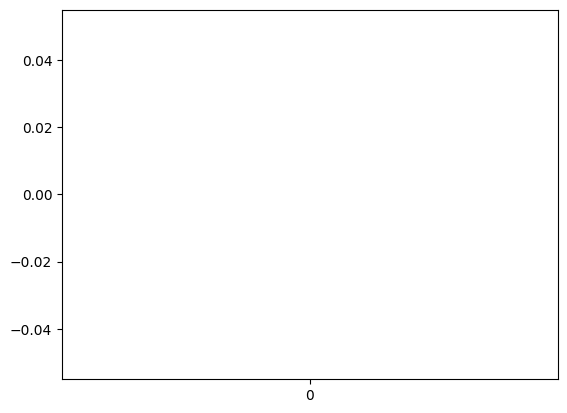

In [26]:
import seaborn as sns
sns.countplot(x = data['CHURN'])

In [29]:
#Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
x = new_data.drop('CHURN', axis = 1)
y = new_data['CHURN']
dtc = DecisionTreeClassifier()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)
dtc.fit(xtrain, ytrain)
ypred = dtc.predict(xtrain)
print(classification_report(ypred, ytrain))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28000
           1       1.00      1.00      1.00     23500

    accuracy                           1.00     51500
   macro avg       1.00      1.00      1.00     51500
weighted avg       1.00      1.00      1.00     51500



In [30]:
#Predicting the test
dtc.fit(xtest, ytest)
test = dtc.predict(xtest)
print(classification_report(test, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7037
           1       1.00      1.00      1.00      5839

    accuracy                           1.00     12876
   macro avg       1.00      1.00      1.00     12876
weighted avg       1.00      1.00      1.00     12876



<Axes: >

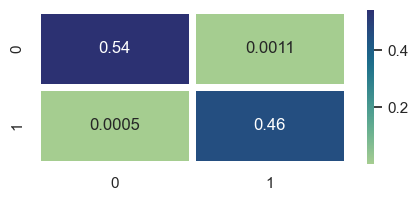

In [31]:
#Confusion Matrix
revealer = confusion_matrix(ypred, ytrain)
plt.figure(figsize = (5, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap ='crest', linewidth = 5)

<Axes: >

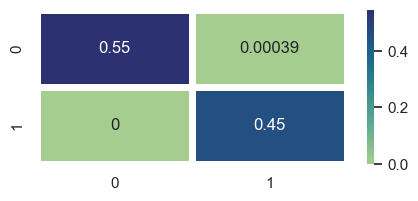

In [32]:
revealer = confusion_matrix(test, ytest)
plt.figure(figsize = (5, 2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap ='crest', linewidth = 5)

In [33]:
#Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x = new_data.drop('CHURN', axis = 1)
y = new_data['CHURN']
log = LogisticRegression()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)
log.fit(xtrain, ytrain)
ypred = log.predict(xtrain)
print(classification_report(ypred, ytrain))


              precision    recall  f1-score   support

           0       0.78      0.79      0.79     27635
           1       0.76      0.75      0.75     23865

    accuracy                           0.77     51500
   macro avg       0.77      0.77      0.77     51500
weighted avg       0.77      0.77      0.77     51500



In [35]:
import pickle
pickle.dump(dtc, open('ChurnModel.pkl', 'wb'))